In [1]:
from scipy.io import arff
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import MetricFunctions

In [2]:
data, meta = arff.loadarff('dataset.arff')
df = pd.DataFrame(data)
for column in df.columns:
    df[column] = df[column].str.decode('utf-8').astype(int)
X = df.drop('Result', axis=1)
y = df['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

In [3]:
rf_classifier = RandomForestClassifier()


param_grid = {
    'n_estimators': [int(x) for x in range(10, 210, 10)],
    'max_depth': [None] + [int(x) for x in range(10, 110, 10)],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=100,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    random_state=42
)

In [4]:
random_search.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   random_state=42, scoring='accuracy')

In [5]:
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: ", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)
y_score = y_prob[:, 1]

Best Parameters:  {'n_estimators': 130, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 50, 'bootstrap': True}
Best Accuracy:  0.9704883501428576


In [6]:
MetricFunctions.printAccuracy(best_model, X_train, X_test, y_train, y_test)
MetricFunctions.printLoss(best_model, X_train, X_test, y_train, y_test)

Test accuracy: 96.70%
Train accuracy: 99.06%
Test Log Loss: 0.08235593364310577
Train Log Loss: 0.0319561527177833


In [7]:
MetricFunctions.printAUCandPvalues(y_test, y_score)

AUC-ROC: 0.9961859674273615
P-value: 0.007628065145276919


In [8]:
MetricFunctions.printAUCPRandF1Scores(y_test, y_pred, y_score)

AUC-PR: 0.9970244671856182
F1 Score: 0.9712258573117856


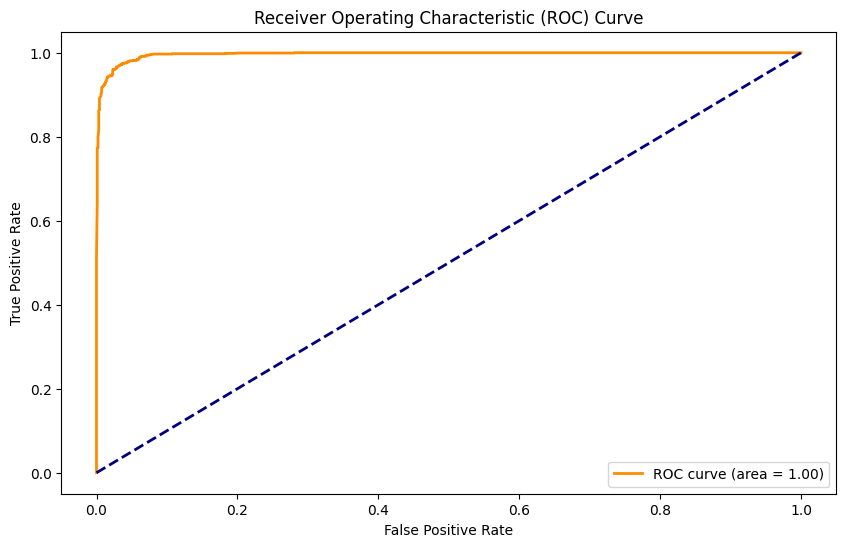

In [9]:
MetricFunctions.plotROCCurve(y_test, y_score)

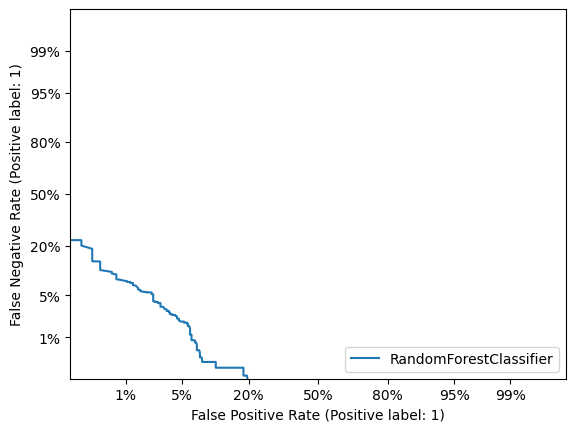

In [10]:
MetricFunctions.plotDetCurve(best_model, X_test, y_test)

Confusion Matrix:
[[ 906   50]
 [  23 1232]]


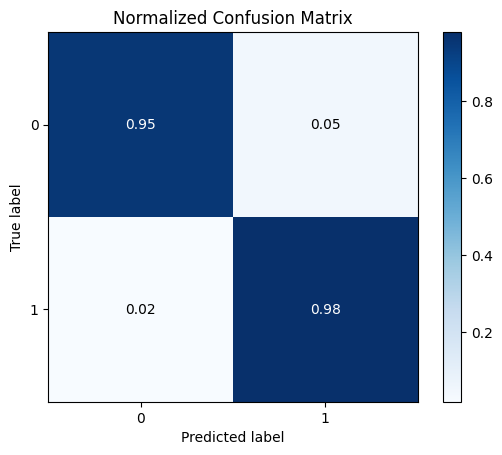

In [11]:
MetricFunctions.printConfMatrix(y_test, y_pred)
MetricFunctions.plotConfMatrix(y_test, y_pred)

C:\Users\Vilius\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


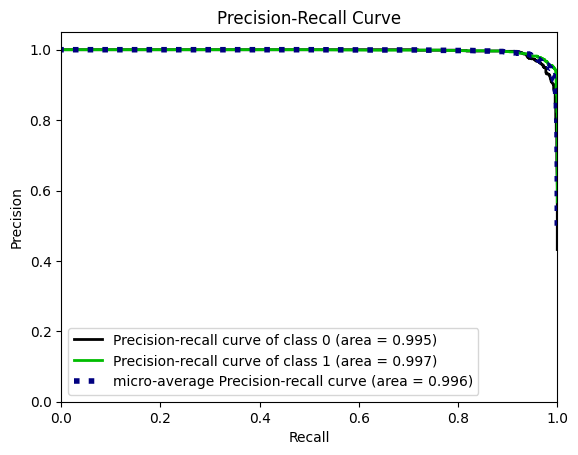

In [12]:
MetricFunctions.plotPrecisionRecallCurve(y_test, y_prob)

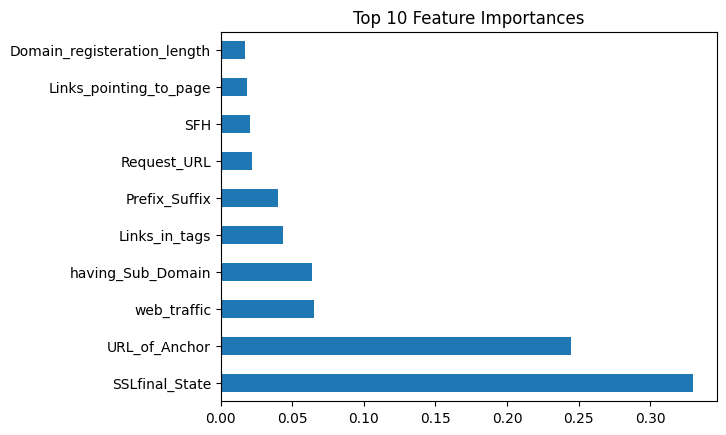

In [13]:
MetricFunctions.plotFeatureImportance(best_model, X)

In [14]:
import joblib
joblib.dump(best_model, 'models/rf_model.pkl')

['models/rf_model.pkl']